# Dataset

In [2]:
!gdown 1oGsM9EAFWiE28jDXT1IKhWwsqzIOcXcN

Downloading...
From: https://drive.google.com/uc?id=1oGsM9EAFWiE28jDXT1IKhWwsqzIOcXcN
To: d:\Python\Heart-Disease-Prediction\cleveland.csv

  0%|          | 0.00/10.9k [00:00<?, ?B/s]
100%|██████████| 10.9k/10.9k [00:00<00:00, 291kB/s]


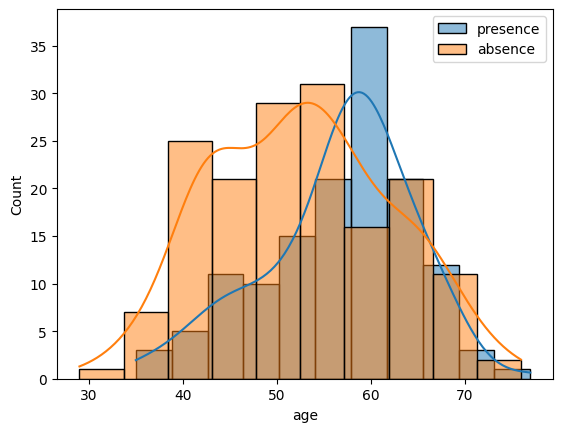

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleveland.csv', header = None)

df.columns = ['age', 'sex', 'cp', 'restbps', 'chol', 'fbs', 'restecg',
              'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

sns.histplot(df.age[df.target==1], kde=True, label = 'presence')
sns.histplot(df.age[df.target==0], kde=True, label = 'absence')
plt.legend()

plt.show()

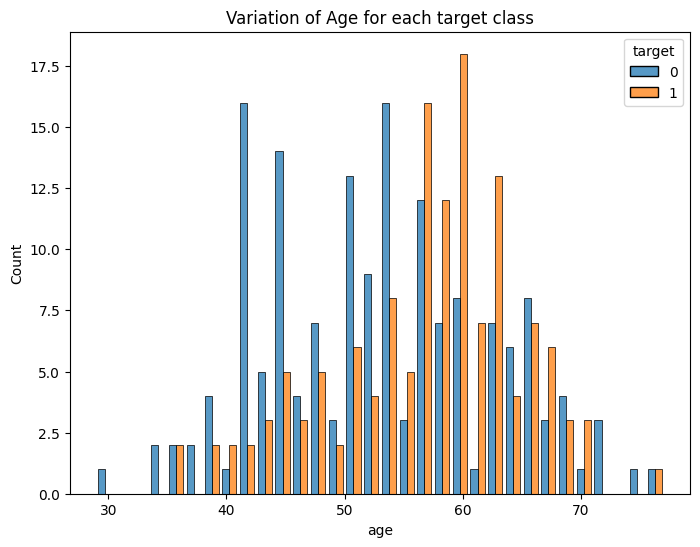

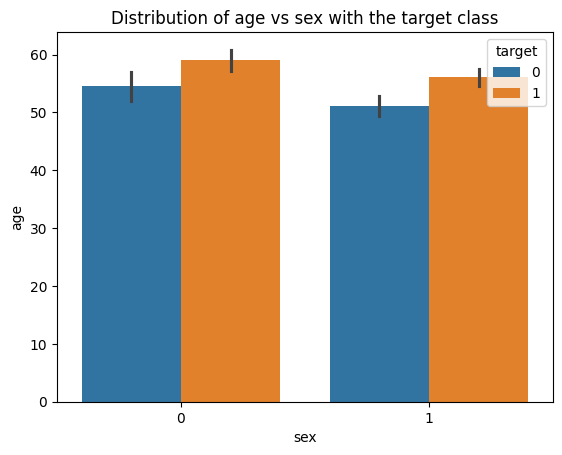

In [4]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', hue='target', element='bars',
             bins=32, multiple='dodge', shrink=0.8)
plt.title('Variation of Age for each target class')
plt.show()

sns.barplot(x='sex', y='age', hue='target', data=df)
plt.title('Distribution of age vs sex with the target class')
plt.show()

# Preprocessing

In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42
)

# KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski'
)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(y_train, knn.predict(X_train))
cm_test = confusion_matrix(y_test, knn.predict(X_test))

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))

Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


# SVM

In [9]:
from sklearn.svm import SVC

svc = SVC(kernel = 'rbf', random_state=42)
svc.fit(X_train, y_train)

SVC(random_state=42)

In [10]:
cm_train = confusion_matrix(y_train, svc.predict(X_train))
cm_test = confusion_matrix(y_test, svc.predict(X_test))

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for SVM = {}'.format(accuracy_for_train))
print(' Accuracy for test set for SVM = {}'.format(accuracy_for_test))

Accuracy for training set for SVM = 0.66
 Accuracy for test set for SVM = 0.67


# Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [12]:
cm_train = confusion_matrix(y_train, nb.predict(X_train))
cm_test = confusion_matrix(y_test, nb.predict(X_test))

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for NB = {}'.format(accuracy_for_train))
print('Accuracy for test set for NB = {}'.format(accuracy_for_test))

Accuracy for training set for NB = 0.85
Accuracy for test set for NB = 0.84


# Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [14]:
cm_train = confusion_matrix(y_train, dt.predict(X_train))
cm_test = confusion_matrix(y_test, dt.predict(X_test))

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for DT = {}'.format(accuracy_for_train))
print('Accuracy for test set for DT = {}'.format(accuracy_for_test))

Accuracy for training set for DT = 1.0
Accuracy for test set for DT = 0.75


# Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

In [16]:
cm_train = confusion_matrix(y_train, rf.predict(X_train))
cm_test = confusion_matrix(y_test, rf.predict(X_test))

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for RF = {}'.format(accuracy_for_train))
print('Accuracy for test set for RF = {}'.format(accuracy_for_test))

Accuracy for training set for RF = 0.98
Accuracy for test set for RF = 0.8


# AdaBoost

In [17]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
ada.fit(X_train, y_train)

c:\Users\Huy\anaconda3\envs\aio2024\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

In [18]:
cm_train = confusion_matrix(y_train, ada.predict(X_train))
cm_test = confusion_matrix(y_test, ada.predict(X_test))

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for Ada = {}'.format(accuracy_for_train))
print('Accuracy for test set for Ada = {}'.format(accuracy_for_test))

Accuracy for training set for Ada = 0.91
Accuracy for test set for Ada = 0.84


# GradientBoost

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,
                                subsample=1.0, min_samples_split=2,
                                max_depth=3, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [21]:
cm_train = confusion_matrix(y_train, gb.predict(X_train))
cm_test = confusion_matrix(y_test, gb.predict(X_test))

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for Gra = {}'.format(accuracy_for_train))
print('Accuracy for test set for Gra = {}'.format(accuracy_for_test))

Accuracy for training set for Gra = 1.0
Accuracy for test set for Gra = 0.85


# XGBoost

In [22]:
!pip install xgboost

In [30]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=100)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [31]:
cm_train = confusion_matrix(y_train, xgb.predict(X_train))
cm_test = confusion_matrix(y_test, xgb.predict(X_test))

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for XG = {}'.format(accuracy_for_train))
print('Accuracy for test set for XG = {}'.format(accuracy_for_test))

Accuracy for training set for XG = 1.0
Accuracy for test set for XG = 0.87


# Stacking

In [25]:
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier()
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

In [26]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('dtc', dtc),
    ('rfc', rfc),
    ('knn', knn),
    ('gc', gc),
    ('svc', svc),
    ('ad', ad)
]

clf = StackingClassifier(
    estimators=estimators,
    final_estimator=xgb
)

clf.fit(X_train, y_train)

c:\Users\Huy\anaconda3\envs\aio2024\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Huy\anaconda3\envs\aio2024\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Huy\anaconda3\envs\aio2024\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Huy\anaconda3\envs\aio2024\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

StackingClassifier(estimators=[('dtc', DecisionTreeClassifier(random_state=42)),
                               ('rfc', RandomForestClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('gc',
                                GradientBoostingClassifier(random_state=42)),
                               ('svc', SVC(random_state=42)),
                               ('ad', AdaBoostClassifier(random_state=42))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [34]:
cm_train = confusion_matrix(y_train, clf.predict(X_train))
cm_test = confusion_matrix(y_test, clf.predict(X_test))

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test), 2)

print('Accuracy for training set for Stacking = {}'.format(accuracy_for_train))
print('Accuracy for test set for Stacking = {}'.format(accuracy_for_test))

Accuracy for training set for Stacking = 0.91
Accuracy for test set for Stacking = 0.87
